In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa
from utils import *

## Audio MNIST

Sample rate of the audio file:  8000


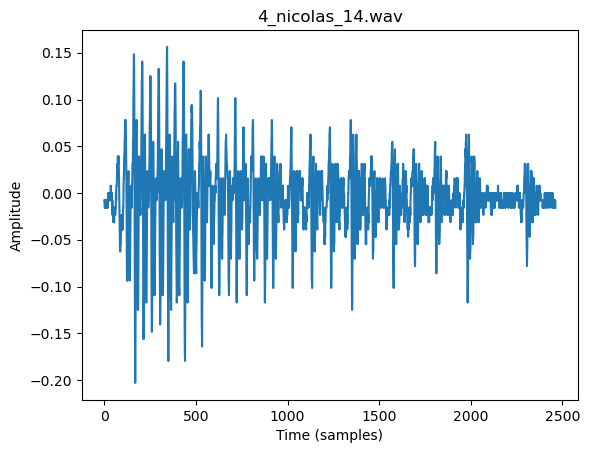

In [2]:
# folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [ ]:
audio_data = load_data_mnist('data/audioMNIST/data')

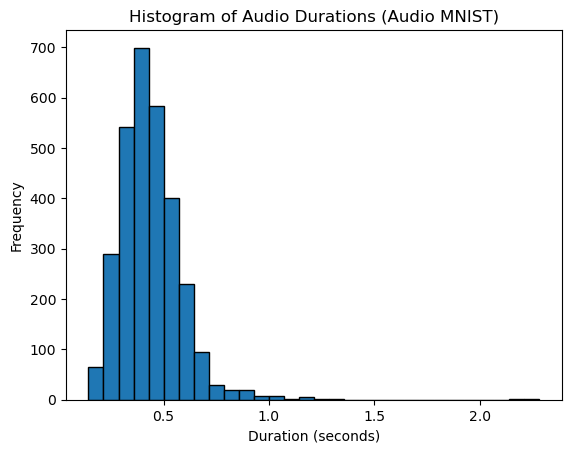

In [3]:
folder_path = "data/audioMNIST/data/"
        
durations = [len(librosa.load(folder_path+file, sr=sr)[0])/sr for file in all_files if file.endswith('.wav')]

plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations (Audio MNIST)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [4]:
max_duration = np.argmax(durations)
min_duration = np.argmin(durations)
print('Longest audio file:', all_files[max_duration], 'Duration:', durations[max_duration], 'seconds')
print('Shortest audio file:', all_files[min_duration], 'Duration:', durations[min_duration], 'seconds')

Longest audio file: 9_theo_16.wav Duration: 2.28275 seconds
Shortest audio file: 6_yweweler_3.wav Duration: 0.1435 seconds


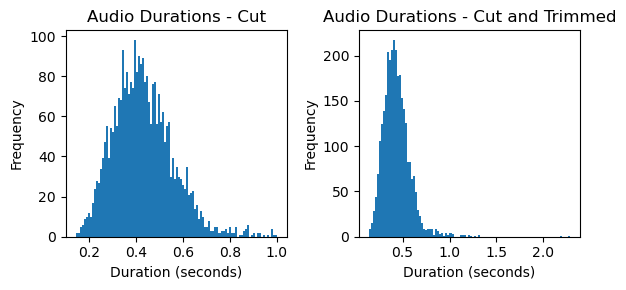

In [13]:
durations = [len(librosa.load(folder_path+"/"+file, sr=sr)[0]) for file in all_files if file.endswith('.wav')]
durations_cut = [x/sr for x in durations if x < 8000]
durations_trimmed = [len(audio)/sr for audio, _ in audio_data]


fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Plot the first histogram
axs[0].hist(durations_cut, bins=100)
axs[0].set_title('Audio Durations - Cut')
axs[0].set_xlabel('Duration (seconds)')
axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(durations_trimmed, bins=100)
axs[1].set_title('Audio Durations - Cut and Trimmed')
axs[1].set_xlabel('Duration (seconds)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

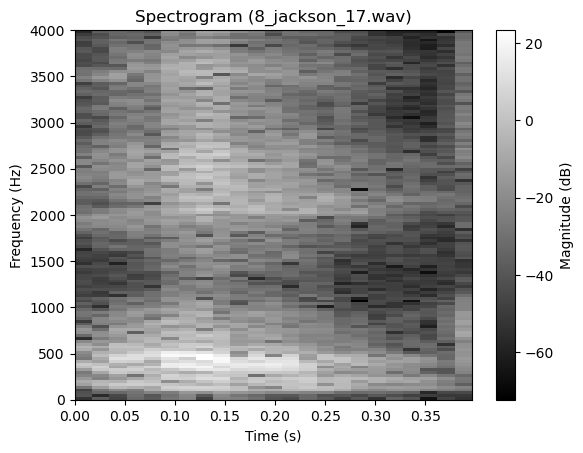

In [4]:
for audio, name in audio_data:
    if name == "8_jackson_17.wav":
        y = audio
        break

# y = audio_data[16][0]
spec = stft(y, frame_size=256, overlap=128)
epsilon = 1e-4
spec_db = np.array(20 * np.log10(np.abs(spec) + epsilon))
sr = 8000
n_frames_spec = spec_db.shape[1] 
time_spec = np.linspace(0, len(y)/sr, n_frames_spec)
plt.imshow(spec_db, aspect='auto', origin='lower', extent=[0, len(y)/sr, 0, sr//2], cmap='gray', interpolation='none')
plt.xlim([0, len(y)/sr])
plt.title(f"Spectrogram (8_jackson_17.wav)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Time (s)")
plt.show()


In [6]:
max_length = np.max([len(y) for y, _ in audio_data])

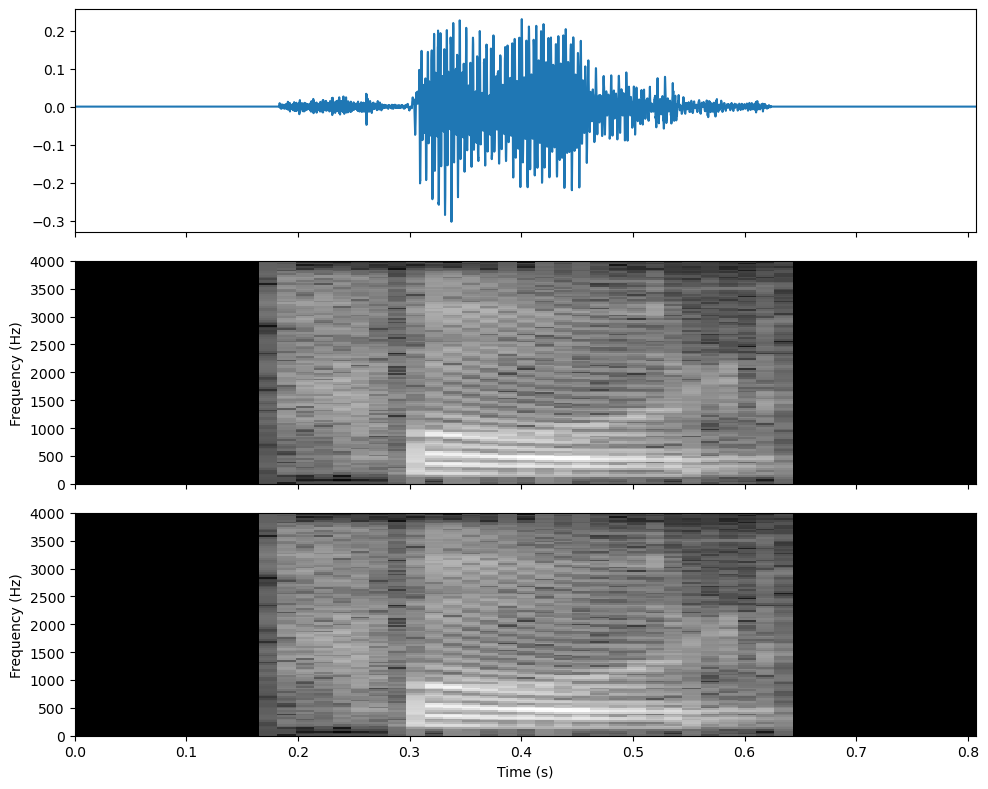

In [11]:
y = audio_data[1227][0]
padded_y = pad_segment(y, 6457)
spec = stft(padded_y, frame_size=256, overlap=128)
epsilon = 1e-4
spec_db = np.array(20 * np.log10(np.abs(spec) + epsilon))
lib = np.abs(librosa.stft(padded_y, n_fft=256, hop_length=256//2, center=False, window = 'hamm'))
lib_db = np.array(20 * np.log10(lib + epsilon))


# Plot the original padded signal with consistent x-axis range
# Time axis for the original signal
time = np.linspace(0, len(padded_y)/sr, len(padded_y))

# Time axis for the spectrograms
n_frames_spec = spec_db.shape[1]  # Number of time frames in your custom spectrogram
n_frames_lib = lib_db.shape[1]  # Number of time frames in the librosa spectrogram

time_spec = np.linspace(0, len(padded_y)/sr, n_frames_spec)
time_lib = np.linspace(0, len(padded_y)/sr, n_frames_lib)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot the original padded signal
ax[0].plot(time, padded_y)
ax[0].set_xlim([0, len(padded_y)/sr])
ax[0].label_outer()

# Plot your custom spectrogram with proper time axis
img1 = ax[1].imshow(spec_db, aspect='auto', origin='lower', extent=[0, len(padded_y)/sr, 0, sr//2], cmap='gray', interpolation='none')
ax[1].set_xlim([0, len(padded_y)/sr])
ax[1].set_ylabel("Frequency (Hz)")
ax[1].label_outer()

# Plot the `librosa` spectrogram with proper time axis
img2 = ax[2].imshow(lib_db, aspect='auto', origin='lower', extent=[0, len(padded_y)/sr, 0, sr//2], cmap='gray', interpolation='none')
ax[2].set_xlim([0, len(padded_y)/sr])
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Frequency (Hz)")

# Adjust layout
plt.tight_layout()
plt.show()

Sample rate of the audio file:  8000


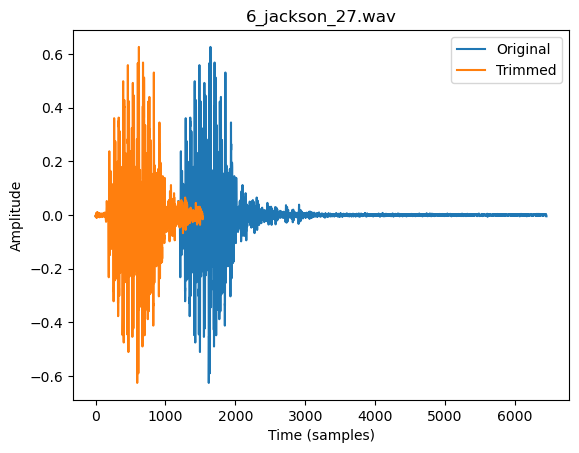

In [12]:
#folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
y_trimmed, idx = librosa.effects.trim(y, frame_length=512, ref=np.mean , top_db=5)

# Plot original y
plt.plot(y, label='Original')
# Plot trimmed y
plt.plot(y[idx[0]:idx[1]], label='Trimmed')
plt.legend()
plt.title(sample_file[0])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude');


## Urbansound

In [3]:
folder_path = "data/audio/"
audio_data = load_data_urban(folder_path)


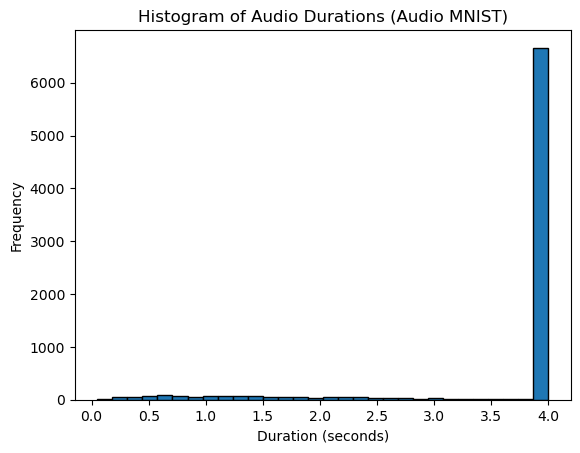

In [4]:
durations = [len(audio)/sr for audio,sr,_ in audio_data]

plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations (Audio MNIST)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [5]:
durations = [len(librosa.load(folder_path+"/"+file, sr=sr)[0]) for file in all_files if file.endswith('.wav')]
durations_cut = [x/sr for x in durations if x < 8000]
durations_trimmed = [len(audio)/sr for audio, _ in audio_data]


fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Plot the first histogram
axs[0].hist(durations_cut, bins=100)
axs[0].set_title('Audio Durations - Cut')
axs[0].set_xlabel('Duration (seconds)')
axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(durations_trimmed, bins=100)
axs[1].set_title('Audio Durations - Cut and Trimmed')
axs[1].set_xlabel('Duration (seconds)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

NameError: name 'all_files' is not defined